In [54]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [55]:
max_words=10000
max_sequence_length=900

In [56]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [57]:
# x_train[0]

In [58]:
y_train[0]

1

In [59]:
from tensorflow import keras

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

# If a sequence is shorter than 500 ,it pads it with zeros at the beginning (by default).
# If a sequence is longer than 500, it truncates the beginning and keeps the last 500 values.

In [60]:
# x_train[0]

In [61]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(x_train, y_train, batch_size=512, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.6368 - loss: 0.6783 - val_accuracy: 0.7967 - val_loss: 0.5703
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 425ms/step - accuracy: 0.8110 - loss: 0.5126 - val_accuracy: 0.8394 - val_loss: 0.3881
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 422ms/step - accuracy: 0.8578 - loss: 0.3493 - val_accuracy: 0.8618 - val_loss: 0.3268
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.8845 - loss: 0.2861 - val_accuracy: 0.8717 - val_loss: 0.3026
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 427ms/step - accuracy: 0.8999 - loss: 0.2470 - val_accuracy: 0.8759 - val_loss: 0.2919
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 461ms/step - accuracy: 0.9206 - loss: 0.2101 - val_accuracy: 0.8782 - val_loss: 0.2878
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 452ms/step - accuracy: 0.9373 - loss: 0.1758 - val_accuracy: 0.8773 - val_loss: 0.2951
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 434ms/step - accuracy: 0.9463 - loss: 0.1544 - val_accuracy: 0.879

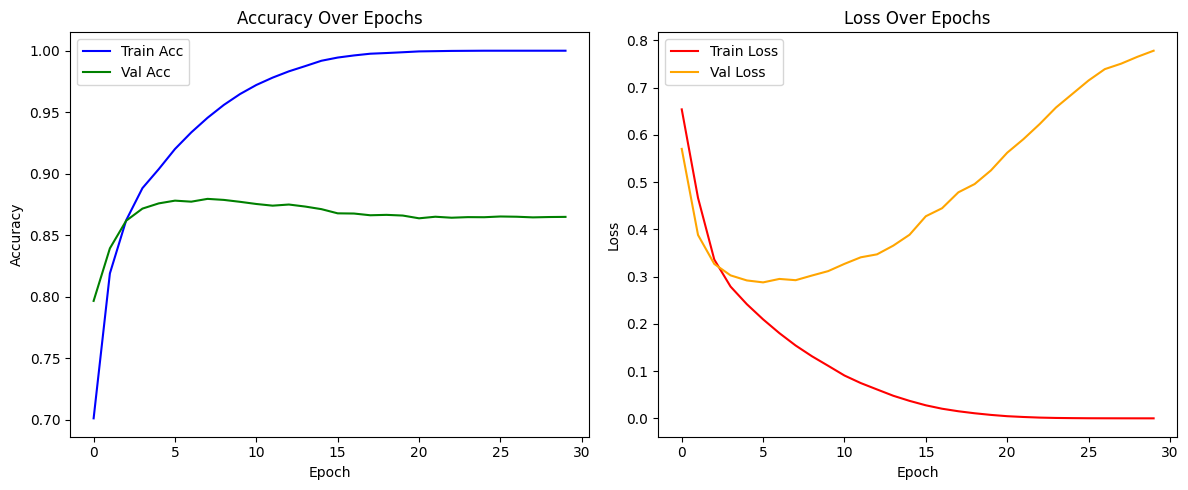

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
# Evaluation

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:{:.2f}%".format(accuracy * 100))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8631 - loss: 0.7636
Test Loss: 0.7780249714851379
Test Accuracy:86.50%


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


<Axes: >

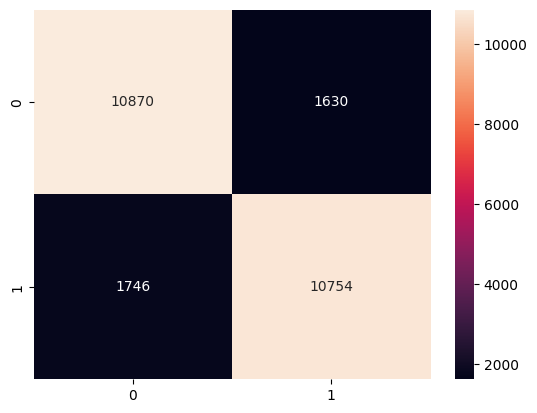

In [64]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [65]:
classification_rep = classification_report(y_test, y_pred)
print("Classificatio Report")
print(classification_rep)

Classificatio Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [66]:
# Sample Example

index=5

sample_review = x_test[index]
sample_review = sample_review.reshape(1, -1)

pred_prob = model.predict(sample_review)[0][0]
pred_label = int(pred_prob > 0.5)

print(f"Predicted Probability: {pred_prob}")
print("Predicted Sentiment:", "Positive" if pred_label == 1 else "Negative")
print("Actual Sentiment:","Positive" if y_test[index]==1 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Probability: 0.9823346138000488
Predicted Sentiment: Positive
Actual Sentiment: Positive
